# Salary Estimation | K-NEAREST NEIGHBOUR MODEL

### *Importing Libraries*

In [1]:
import pandas as pd #useful for loading the dataset
import numpy as np #to perform array
import matplotlib.pyplot as plt
import seaborn as sns

### *Load Dataset*

In [2]:
dataset = pd.read_csv('salary.csv')
dataset


,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
...,...,...,...,...,...
32556,22,10,0,40,<=50K
32557,27,12,0,38,<=50K
32558,40,9,0,40,>50K
32559,58,9,0,40,<=50K


### *Summarize Dataset*


In [3]:
print(dataset.shape)
print(dataset.head(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


In [4]:
dataset.isnull().sum()

age               0
education.num     0
capital.gain      0
hours.per.week    0
income            0
dtype: int64

In [5]:
dataset.describe(include='all')

,age,education.num,capital.gain,hours.per.week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,<=50K
freq,NaN,NaN,NaN,NaN,24720
mean,38.581647,10.080679,1077.648844,40.437456,NaN
std,13.640433,2.572720,7385.292085,12.347429,NaN
min,17.000000,1.000000,0.000000,1.000000,NaN
25%,28.000000,9.000000,0.000000,40.000000,NaN
50%,37.000000,10.000000,0.000000,40.000000,NaN
75%,48.000000,12.000000,0.000000,45.000000,NaN


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [7]:
dataset.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

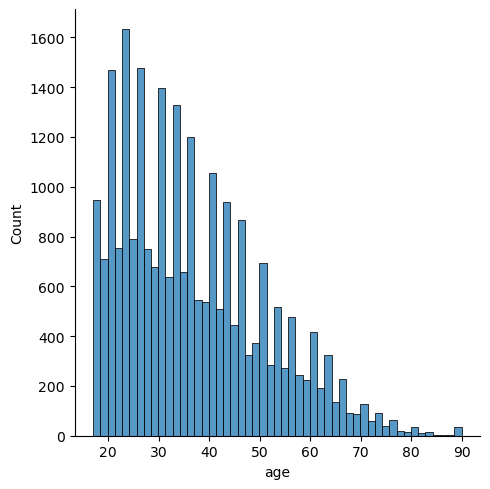

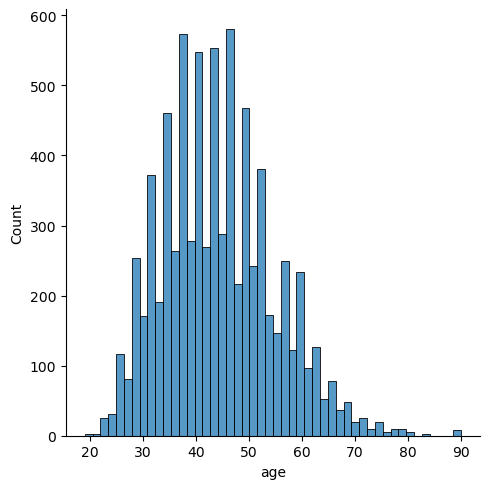

In [8]:
sns.displot(dataset.age[dataset.income=='<=50K'])
sns.displot(dataset.age[dataset.income=='>50K'])
plt.show()

C:\Users\SANKET\AppData\Local\Temp\ipykernel_20732\3057105953.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.age[dataset.income=='<=50K'])
C:\Users\SANKET\AppData\Local\Temp\ipykernel_20732\3057105953.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.age[dataset.income=='>

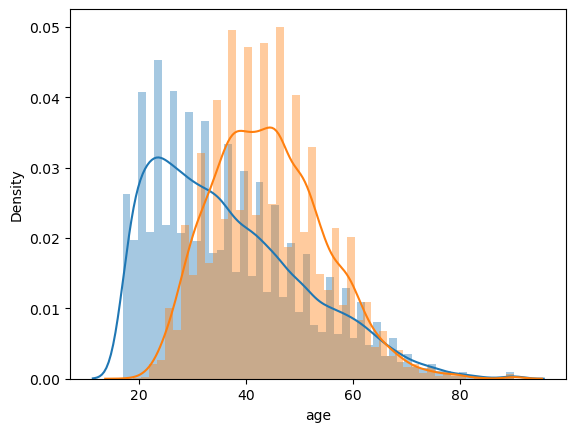

In [9]:
sns.distplot(dataset.age[dataset.income=='<=50K'])
sns.distplot(dataset.age[dataset.income=='>50K'])
plt.show()

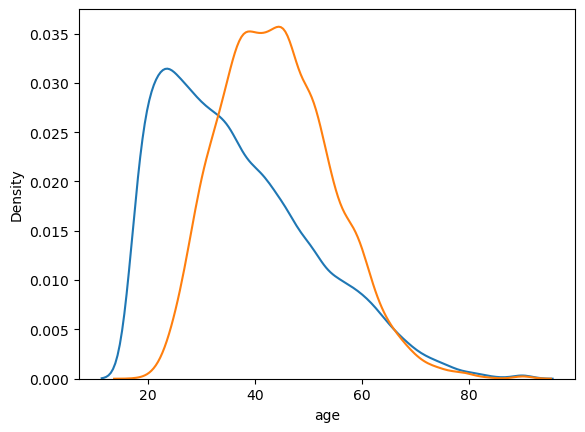

In [10]:
sns.kdeplot(dataset.age[dataset.income=='<=50K'])
sns.kdeplot(dataset.age[dataset.income=='>50K'])
plt.show()

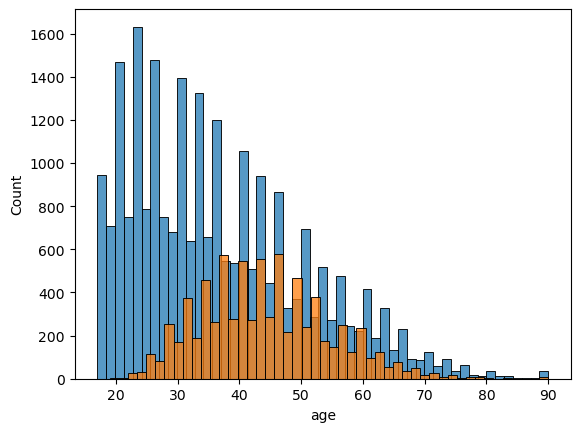

In [11]:
sns.histplot(dataset.age[dataset.income=='<=50K'])
sns.histplot(dataset.age[dataset.income=='>50K'])
plt.show()

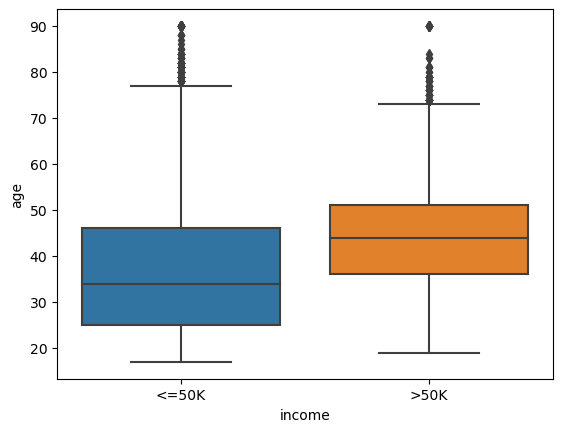

In [12]:
sns.boxplot(x=dataset.income,y=dataset.age)
plt.show()

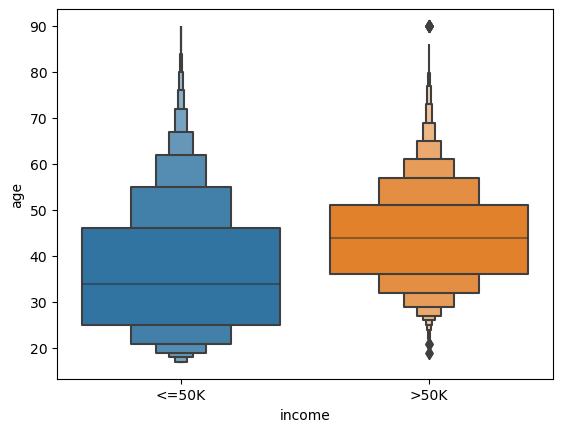

In [13]:
sns.boxenplot(x=dataset.income,y=dataset.age)
plt.show()

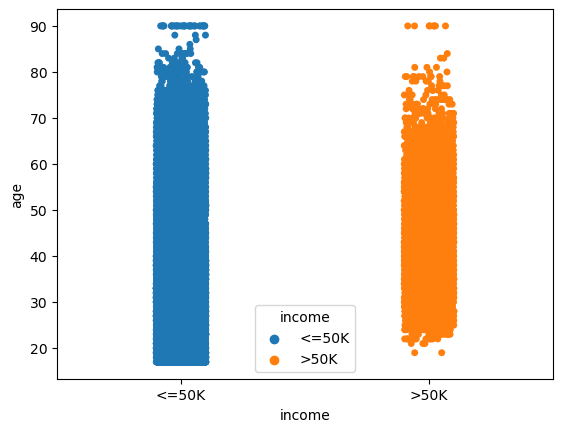

In [14]:
sns.stripplot(x=dataset.income,y=dataset.age,hue=dataset.income)
plt.show()

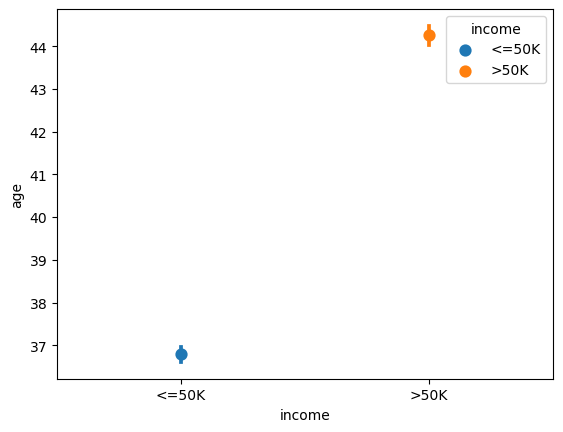

In [15]:
sns.pointplot(x=dataset.income,y=dataset.age,hue=dataset.income)
plt.show()

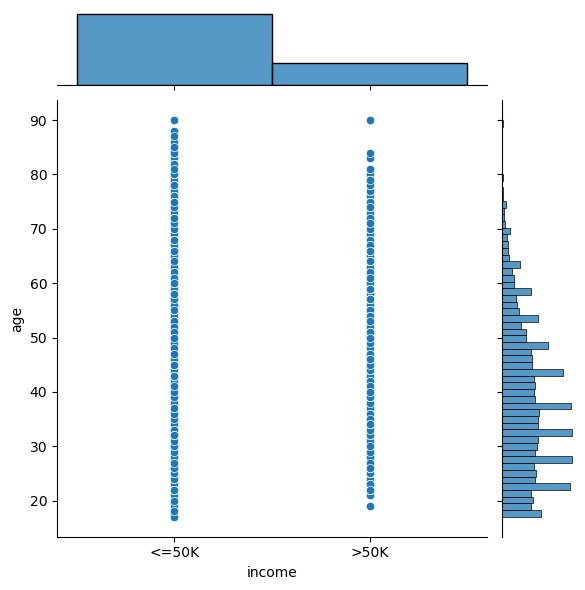

In [17]:
sns.jointplot(x=dataset.income,y=dataset.age)
plt.show()

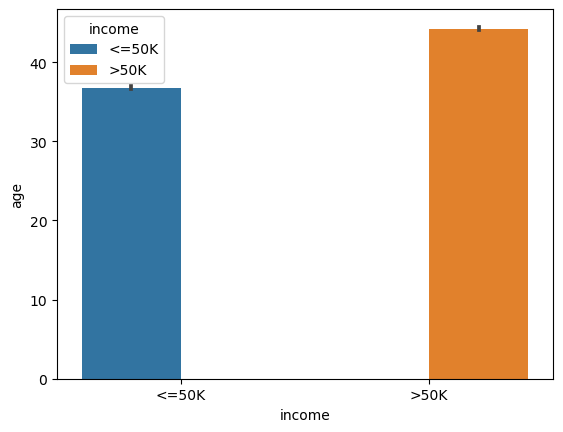

In [18]:
sns.barplot(x=dataset.income,y=dataset.age,hue=dataset.income)
plt.show()

# *Mapping Salary Data to Binary Value* or Encoding

In [7]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(dataset.head())

   age  education.num  capital.gain  hours.per.week  income
0   90              9             0              40       0
1   82              9             0              18       0
2   66             10             0              40       0
3   54              4             0              40       0
4   41             10             0              40       0


### *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

In [9]:
X = dataset.iloc[:, :-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [10]:
Y = dataset.iloc[:, -1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

### *Splitting Dataset into Train & Test*

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### *Feature Scaling*
### we scale our data to make all the features contribute equally to the result
###Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data
###Transform - Transform method is transforming all the features using the respective mean and variance, 
###We want our test data to be a completely new and a surprise set for our model

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

### *Finding the Best K-Value*

Text(0, 0.5, 'Mean Error')

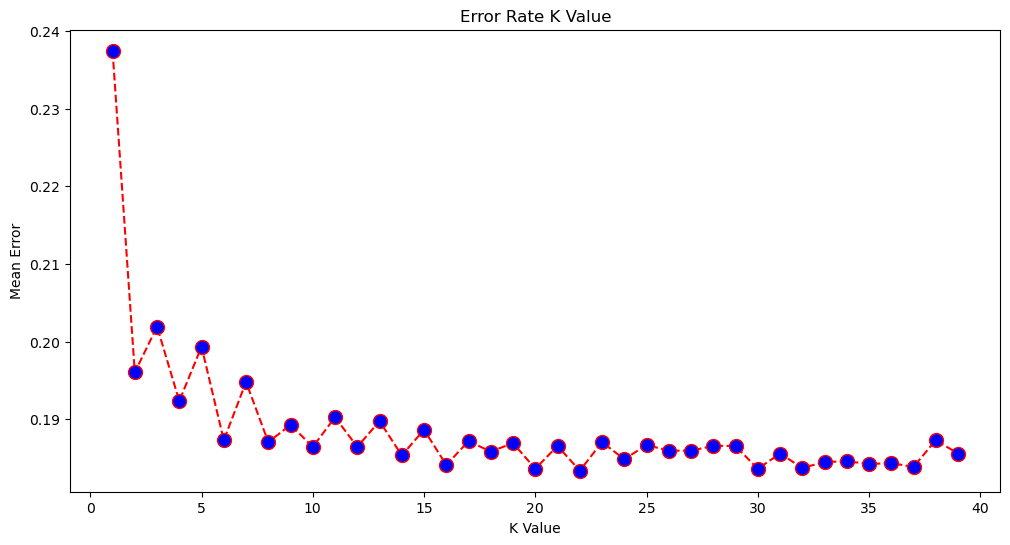

In [13]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### *Training*

In [14]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

### *Predicting, wheather new customer with Age & Salary will Buy or Not*

In [15]:
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Captital Gain: "))
wh = int(input("Enter New Employee's Hour's Per week: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Employee might got Salary above 50K")
else:
  print("Customer might not got  Salary above 50K")

Enter New Employee's Age: 23
Enter New Employee's Education: 3
Enter New Employee's Captital Gain: 3
Enter New Employee's Hour's Per week: 3
[0]
Customer might not got  Salary above 50K


### *Prediction for all Test Data*

In [16]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### *Evaluating Model - CONFUSION MATRIX*

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[5886  307]
 [1223  725]]
Accuracy of the Model: 81.2062400196536%
